<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/0807/La2_3b_2Vpp_Hgating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `git config --global user.email {userdata.get('email')}'
Cloning into 'gator'...
remote: Enumerating objects: 1515, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 1515 (delta 74), reused 17 (delta 17), pack-reused 1411
Receiving objects: 100% (1515/1515), 103.13 MiB | 24.53 MiB/s, done.
Resolving deltas: 100% (896/896), done.
Updating files: 100% (198/198), done.


'/content'

### 24-08-06 La2/3-b Hgating
**Only use HMIM-TFSI**

Gate voltage parameters :
- Amp : 2Vpp
- Offset : 500 mV
- Duty Cycle : 1%
- Power supply: 1V

 Time 1250: Start gating



In [13]:
%cd "/content/gator/data/0807/"

/content/gator/data/0807


In [14]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [15]:
prep_csv('/content/gator/data/0807/defbuffer1_0806_144324.csv')
df = pd.read_csv('/content/gator/data/0807/defbuffer1_0806_144324.csv')


Fill Mode,1



In [16]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,0.007049,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999959,Volt DC,1,T,2W,F,F,0.000000
1,0.007049,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999961,Volt DC,1,T,2W,F,F,0.069381
2,0.007049,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999961,Volt DC,1,T,2W,F,F,0.138702
3,0.007049,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999961,Volt DC,1,T,2W,F,F,0.208017
4,0.007049,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999961,Volt DC,1,T,2W,F,F,0.277346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12361,0.007129,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999960,Volt DC,1,T,2W,F,F,856.959124
12362,0.007129,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999959,Volt DC,1,T,2W,F,F,857.028462
12363,0.007117,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999960,Volt DC,1,T,2W,F,F,857.097802
12364,0.007119,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999959,Volt DC,1,T,2W,F,F,857.167135


In [17]:
# Time (s)
T = df['Relative Time']

# Current (nA)
I = df['Reading'] * 1e12

# Potential (mV)
V = df['Value'] * 1e3

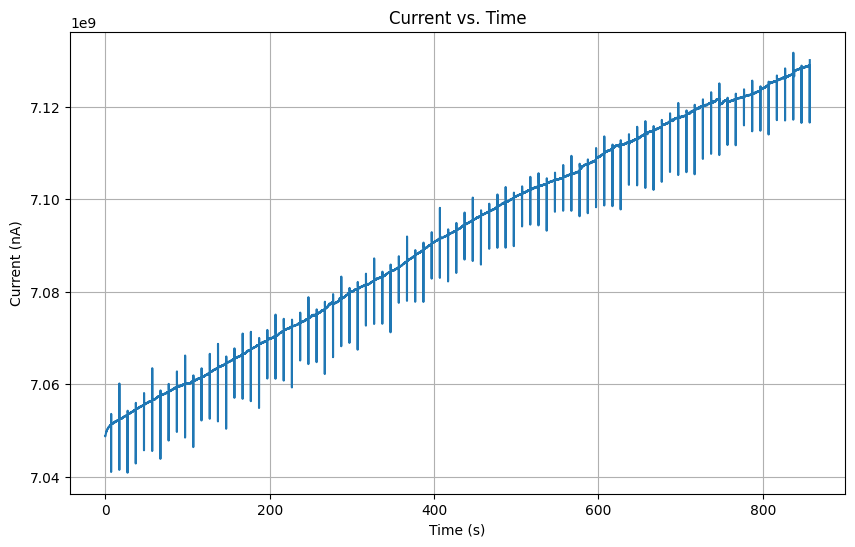

In [18]:
plt.figure(figsize=(10, 6))

plt.plot(T, I)

plt.xlabel('Time (s)')
plt.ylabel('Current (nA)')

plt.title('Current vs. Time')

plt.grid(True)
plt.show()


In [19]:
df_new = df[['Relative Time', 'Value', 'Reading']]
df_new.loc[:, 'Reading'] = df_new['Reading'] * 1e12
df_new.loc[:, 'Value'] = df_new['Value'] * 100
df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)


<ipython-input-19-05c1968da0ac>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)"])
fig.show()
